# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Loading Dataset

In [9]:
dataset = pd.read_csv('data_color.csv',index_col=False)
dataset

,blue,green,red,label
0,240,139,20,Blue
1,72,83,174,Brown
2,131,249,144,Green
3,156,25,168,Pink
4,136,182,30,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [10]:
dataset.describe()

,blue,green,red
count,5052.000000,5052.000000,5052.000000
mean,128.296912,126.316310,127.416073
std,74.174008,74.927131,73.958449
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,130.000000,127.000000,128.000000
75%,192.000000,192.000000,191.000000
max,255.000000,255.000000,255.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   blue    5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   red     5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


# Plot datasets

In [12]:
blue_data = dataset.loc[dataset['label'] == 'Blue']
brown_data = dataset.loc[dataset['label'] == 'Brown']
green_data = dataset.loc[dataset['label'] == 'Green']
pink_data = dataset.loc[dataset['label'] == 'Pink']
yellow_data = dataset.loc[dataset['label'] == 'Yellow']
orange_data = dataset.loc[dataset['label'] == 'Orange']
purple_data = dataset.loc[dataset['label'] == 'Purple']
red_data = dataset.loc[dataset['label'] == 'Red']
grey_data = dataset.loc[dataset['label'] == 'Grey']
greygrey_data = dataset.loc[dataset['label'] == 'GreyGrey']
black_data = dataset.loc[dataset['label'] == 'Black']

In [13]:
blue_data

,blue,green,red,label
0,240,139,20,Blue
9,64,3,38,Blue
12,177,161,24,Blue
14,236,103,125,Blue
26,248,183,119,Blue
...,...,...,...,...
4994,192,130,101,Blue
4995,219,117,128,Blue
4997,241,153,143,Blue
4998,237,171,135,Blue


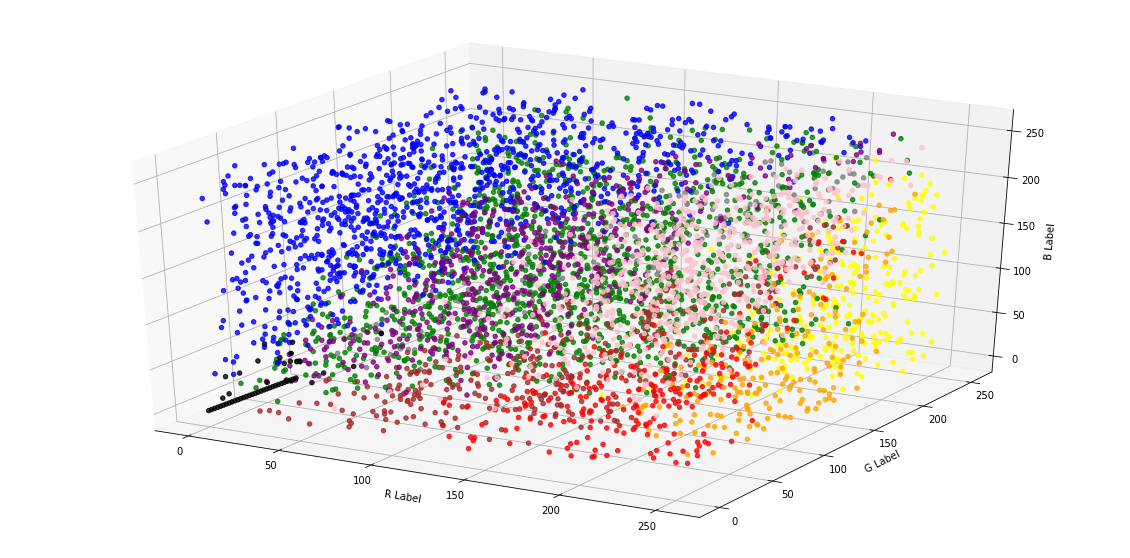

In [14]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')

ax.scatter(blue_data['red'], blue_data['green'],blue_data['blue'], alpha=0.8, c='Blue')
ax.scatter(brown_data['red'], brown_data['green'],brown_data['blue'], alpha=0.8, c='Brown')
ax.scatter(green_data['red'], green_data['green'],green_data['blue'], alpha=0.8, c='Green')
ax.scatter(pink_data['red'], pink_data['green'],pink_data['blue'], alpha=0.8, c='Pink')

ax.scatter(yellow_data['red'], yellow_data['green'],yellow_data['blue'], alpha=0.8, c='Yellow')
ax.scatter(orange_data['red'], orange_data['green'],orange_data['blue'], alpha=0.8, c='Orange')
ax.scatter(purple_data['red'], purple_data['green'],purple_data['blue'], alpha=0.8, c='Purple')
ax.scatter(red_data['red'], red_data['green'],red_data['blue'], alpha=0.8, c='Red')

ax.scatter(grey_data['red'], grey_data['green'],grey_data['blue'], alpha=0.8, c='Grey')
ax.scatter(greygrey_data['red'], greygrey_data['green'],greygrey_data['blue'], alpha=0.8, c='Grey')
ax.scatter(black_data['red'], black_data['green'],black_data['blue'], alpha=0.8, c='Black')

ax.set_xlabel('R Label')
ax.set_ylabel('G Label')
ax.set_zlabel('B Label')

plt.show()

# One hot

In [17]:
feature = dataset[["blue","green","red"]]
target = dataset[["label"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,train_size=0.8)
X_train.head()

,blue,green,red
3344,213,49,216
3886,199,71,84
1569,85,106,95
3154,120,231,175
335,44,157,201


In [20]:
y_train.head()

,label
3344,Pink
3886,Blue
1569,Grey
3154,Green
335,Brown


# Modul KNN

In [23]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)
predict_labels = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [24]:
predict_labels

array(['Pink', 'Green', 'Green', ..., 'Purple', 'Yellow', 'Green'],
      dtype=object)

# Confusion matrix

In [32]:
cnf_matrix = confusion_matrix(y_test, predict_labels)
cnf_matrix

array([[ 11,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 196,   0,   8,   1,   0,   0,   3,   0,   0,   0],
       [  2,   0,  60,   1,   1,   3,   1,   1,   0,   0,   1],
       [  2,   8,   6, 280,   1,   0,   0,   0,   0,   0,   6],
       [  0,   3,   1,   4,  30,   0,   0,   1,   0,   0,   0],
       [  0,   0,   3,   0,   0,  30,   0,   0,   4,   0,   0],
       [  0,   0,   1,   0,   2,   0, 102,   8,   1,   0,   0],
       [  1,  13,   3,   0,   2,   0,  16,  90,   0,   0,   0],
       [  0,   0,   3,   0,   0,   0,   4,   0,  35,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   5,   0],
       [  0,   0,   2,   7,   0,   2,   0,   0,   0,   0,  43]])

In [39]:
lables = dataset['label'].unique()
lables

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

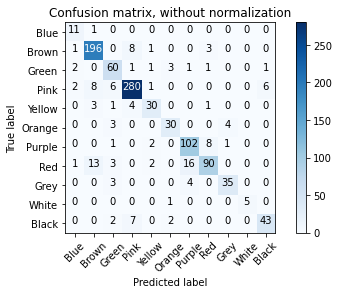

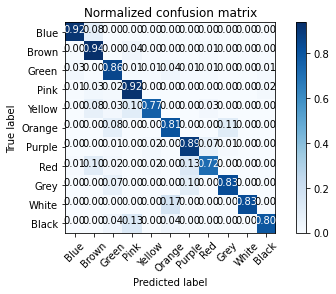

In [40]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = lables
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Accuracy

Check performance using accuracy

In [30]:
accuracy_score(y_test, predict_labels)

0.8724035608308606